In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
plt.figure(figsize=(14,6))
the_path = os.getcwd()
data_path = the_path + '/data/processed-data/'
file_name  = 'BTC-USDT_resampled_10min.csv'
file_path = data_path + file_name
df_data    = pd.read_csv(file_path) # load csv file

<Figure size 1008x432 with 0 Axes>

In [4]:
df_data.head(5) # peak on the dataset

,2018-08-05 08:30:00,Unnamed: 1
0,2018-08-05 08:40:00,7002.00
1,2018-08-05 08:50:00,6993.00
2,2018-08-05 09:00:00,6994.25
3,2018-08-05 09:10:00,6997.80
4,2018-08-05 09:20:00,6990.80


In [5]:
#df_data['Average'] = (df_data['Open*']+df_data['Close**'])/2
df_data.columns = ['Date', 'Average']
df_data['Date'] = pd.to_datetime(df_data['Date'])
df_data.index = df_data['Date']

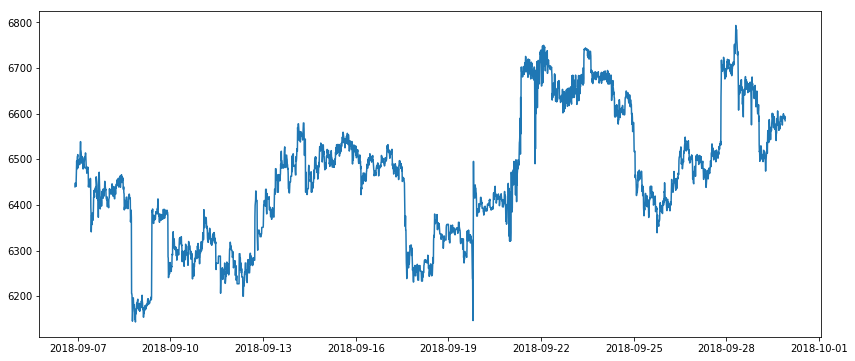

In [39]:
new_df = df_data.last('23D').copy()
plt.figure(figsize=(14,6))
plt.plot(new_df['Date'], new_df['Average'])
plt.show()

In [28]:
new_df.rename(columns={'Date': 'ds', 'Average': 'y'}, inplace=True)
new_df.head(5)

,ds,y
Date,,
2018-08-29 21:50:00,2018-08-29 21:50:00,7062.15
2018-08-29 22:00:00,2018-08-29 22:00:00,7059.00
2018-08-29 22:10:00,2018-08-29 22:10:00,7050.40
2018-08-29 22:20:00,2018-08-29 22:20:00,7048.00
2018-08-29 22:30:00,2018-08-29 22:30:00,7059.75


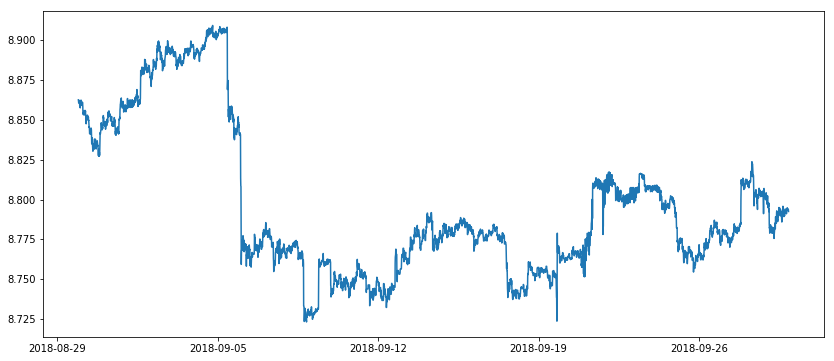

In [29]:
new_df['y'] = np.log(new_df['y'])
plt.figure(figsize=(14,6))
plt.plot(new_df['ds'], new_df['y'])
plt.show()

In [30]:
m = Prophet(changepoint_prior_scale=0.5)
m.fit(new_df)
future = m.make_future_dataframe(periods=288, freq='10min')
future.tail()

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/usr/local/lib/python3.6/dist-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds
4747,2018-10-01 21:00:00
4748,2018-10-01 21:10:00
4749,2018-10-01 21:20:00
4750,2018-10-01 21:30:00
4751,2018-10-01 21:40:00


In [31]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yhat
4747,2018-10-01 21:00:00,8.762489,8.696358,8.828605,8.680844,8.818567,-0.013956,-0.013956,-0.013956,0.001434,0.001434,0.001434,0.0,0.0,0.0,-0.015391,-0.015391,-0.015391,8.748533
4748,2018-10-01 21:10:00,8.762453,8.695757,8.828945,8.681960,8.817315,-0.014140,-0.014140,-0.014140,0.001460,0.001460,0.001460,0.0,0.0,0.0,-0.015600,-0.015600,-0.015600,8.748313
4749,2018-10-01 21:20:00,8.762417,8.695166,8.829083,8.682632,8.817175,-0.014341,-0.014341,-0.014341,0.001468,0.001468,0.001468,0.0,0.0,0.0,-0.015809,-0.015809,-0.015809,8.748076
4750,2018-10-01 21:30:00,8.762381,8.694819,8.829209,8.682325,8.820515,-0.014560,-0.014560,-0.014560,0.001457,0.001457,0.001457,0.0,0.0,0.0,-0.016017,-0.016017,-0.016017,8.747821
4751,2018-10-01 21:40:00,8.762345,8.694389,8.829422,8.680702,8.818245,-0.014797,-0.014797,-0.014797,0.001427,0.001427,0.001427,0.0,0.0,0.0,-0.016223,-0.016223,-0.016223,8.747548


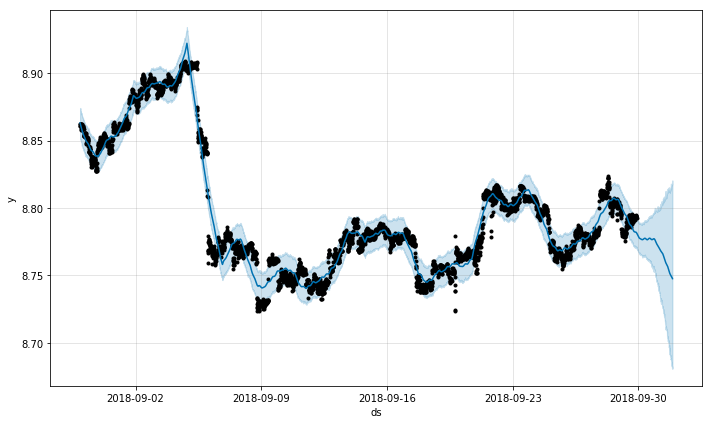

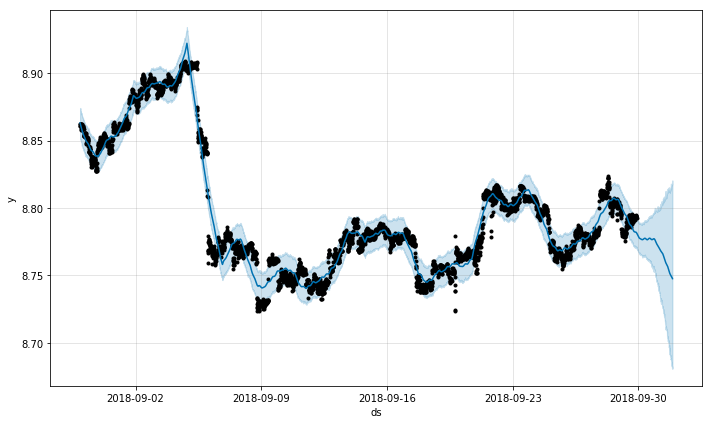

In [32]:
m.plot(forecast)

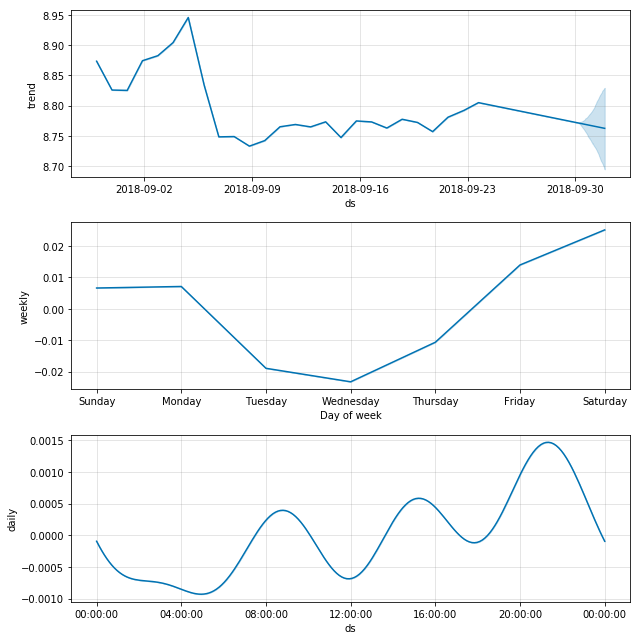

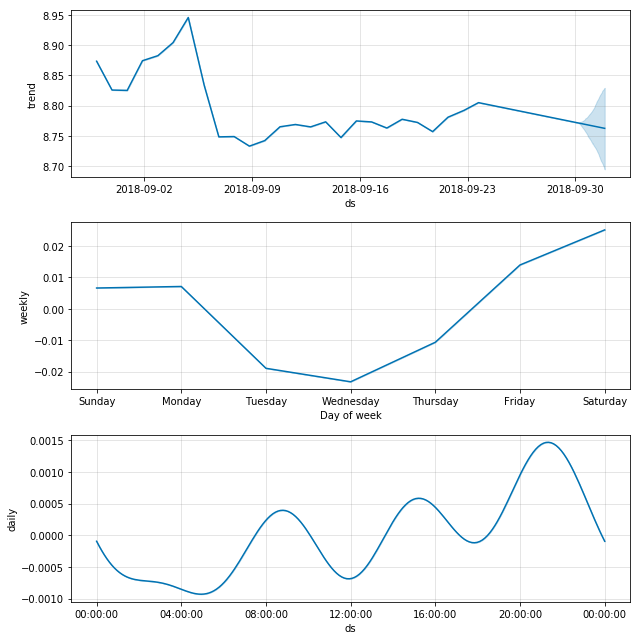

In [33]:
m.plot_components(forecast)

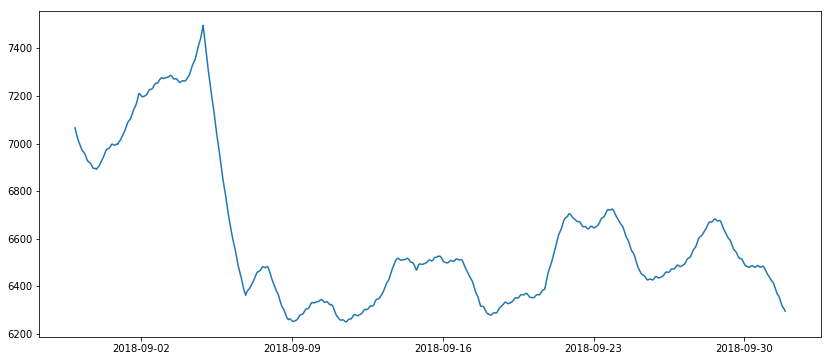

In [34]:
normal_df = forecast[['ds', 'yhat']].copy()
normal_df['yhat'] = np.exp(normal_df['yhat'])
normal_df['ds'] = pd.to_datetime(normal_df['ds'])
normal_df.set_index(normal_df['ds'], inplace=True)
plt.figure(figsize=(14,6))
plt.plot(normal_df['ds'], normal_df['yhat'])
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
metric_df = forecast.set_index('ds')[['yhat']].join(new_df.set_index('ds').y).reset_index()
metric_df.tail()

,ds,yhat,y
4747,2018-10-01 21:00:00,8.748533,NaN
4748,2018-10-01 21:10:00,8.748313,NaN
4749,2018-10-01 21:20:00,8.748076,NaN
4750,2018-10-01 21:30:00,8.747821,NaN
4751,2018-10-01 21:40:00,8.747548,NaN


In [36]:
metric_df.dropna(inplace=True)
r2_score(np.exp(metric_df.y), np.exp(metric_df.yhat))

0.9673492660276759

In [37]:
mean_squared_error(np.exp(metric_df.y), np.exp(metric_df.yhat))

3361.6406694639477

In [38]:
mean_absolute_error(np.exp(metric_df.y), np.exp(metric_df.yhat))

43.79594153610738

In [27]:
'''
0.9737874785556588
2934.133714376784
41.417744879010215
'''

'\n0.9737874785556588\n2934.133714376784\n41.417744879010215\n'